# 4. 建模与调参

## 4.1 内容介绍

1. 逻辑斯蒂回归建模 (Logistic Regression)
2. 树模型 (Tree Model)
3. 集成模型 (Ensemble Model)
4. 如何进行模型对比和评估
5. 模型如何调参

## 4.2 模型的相关原理介绍

### 4.2.1. 逻辑斯蒂回归

逻辑回归将数据拟合到一个logistic函数中，从而能够对事件发生的概率进行预测。

参考链接：https://blog.csdn.net/han_xiaoyang/article/details/49123419

**模型的优点：**

1) 训练速度较快，计算量只和特征值的总量相关。

2) 模型的可解释性非常好，从特征的权重可以看到不同的特征对最后结果的影响。

3) 适合二分类问题。

4) 内存资源占用小，只需要存储各个维度的特征值。

**模型的缺点：**

1) 逻辑回归需要做数据预处理，预先处理缺失值和异常值。

2) 不能用逻辑回归去解决非线性问题，因为Logistic的决策面是线性的(因为要保证cost function的凸性)。

3) 对多重共线性数据较为敏感，且很难处理数据不平衡的问题（可能需要down sample）。

4) 准确率并不是很高，因为形式非常简单，很难去拟合数据的真实分布。

### 4.2.2 决策树模型

**决策树模型非常经典的类别之一是ID3：**

ID3算法的核心是在决策树各个结点上利用信息增益去选择相应的特征，递归地构建决策树。

具体方法是：从根结点(root node)开始，对结点计算所有可能的特征的信息增益，选择信息增益最大的特征作为结点的特征，由该特征的不同取值建立子节点；再对子结点递归地调用以上方法，构建决策树；直到所有特征的信息增益均很小（小于limit），或者树的深度达到设定极限，又或者没有特征可以选择为止，最后得到一个决策树。ID3相当于用极大似然法进行概率模型的选择。


**决策树的优点：**

1) 简单直观，生成的决策树可以可视化展示

2) 数据不需要预处理，不需要归一化，不需要处理缺失数据

3) 既可以处理离散值，也可以处理连续值

4) 可以利用random forest(基于决策树的集成模型)去计算每个特征值的significance level。这适合于特征值选择。

**决策树的缺点：**

1) 决策树算法非常容易过拟合，导致泛化能力不强（可进行适当的剪枝-限制树的深度）

2) 采用的是贪心算法，容易得到局部最优解

### 4.2.3 集成模型集成方法

通过组合多个学习器来完成学习任务，通过集成方法，可以将多个弱学习器组合成一个强分类器，因此集成学习的泛化能力一般比单一分类器要好。

集成方法主要包括Bagging和Boosting，Bagging和Boosting都是将已有的分类或回归算法通过一定方式组合起来，形成一个更加强大的分类。两种方法都是把若干个分类器整合为一个分类器的方法，只是整合的方式不一样，最终得到不一样的效果。

1) 常见的基于Baggin思想的集成模型有：随机森林

2) 基于Boosting思想的集成模型有：Adaboost、GBDT、XgBoost、LightGBM等。

Baggin和Boosting的区别总结如下：

**样本选择上：**

1) Bagging方法的训练集是从原始集中有放回的选取，所以从原始集中选出的各轮训练集之间是互相独立的；

2) Boosting方法需要每一轮的训练集不变，只是训练集中每个样本在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整

**样例权重上：**

1) Bagging方法使用均匀取样，所以每个样本的权重相等；

2) Boosting方法根据错误率不断调整样本的权值，错误率越大则权重越大

**预测函数上：**

1) Bagging方法中所有预测函数的权重相等

2) Boosting方法中每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重

**并行计算上：**

1) Bagging方法中各个预测函数可以并行生成

2) Boosting方法各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。

#### 4.2.3.1 Random Forest

随机森林中有许多的分类树。我们要将一个输入样本进行分类，我们需要将输入样本输入到每棵树中进行分类,每个树都会对样本进行分类结果大的投票，获得票数最多的类别就是森林的分类结果。

森林中的每棵树都是独立的，99.9%不相关的树做出的预测结果涵盖所有的情况，这些预测结果将会彼此抵消。少数优秀的树的预测结果将会脱颖而出。

做出一个好的预测。将若干个弱分类器的分类结果进行投票选择，从而组成一个强分类器，这就是随机森林bagging的思想。

每棵树的按照如下规则生成：

1) 如果训练集大小为N，对于每棵树而言，**随机且有放回地**从训练集中的抽取K个训练样本（这种采样方式称为bootstrap sample方法），作为该树的训练集；

从这里我们可以知道：每棵树的训练集都是不同的，而且里面包含重复的训练样本。

为什么要随机抽样训练集？

如果不进行随机抽样，每棵树的训练集都一样，那么最终训练出的树分类结果也是完全一样的，这样的话完全没有bagging的必要；

为什么要有放回地抽样？

如果不是有放回的抽样，那么每棵树的训练样本都是不同的，都是没有交集的，这样每棵树都是"有偏的"。

2) 如果每个样本的特征维度为M，指定一个常数m<<M，**随机地从M个特征中选取m个特征子集**，每次树进行分裂时，从这m个特征中选择最优的；

3) 每棵树都尽最大程度的生长，并且没有剪枝过程。

**随机森林中的“随机”就是指的这里的两个随机性。**
  
两个随机性的引入对随机森林的分类性能至关重要。由于它们的引入，使得随机森林不容易陷入过拟合，并且具有很好得抗噪能力（比如：对缺省值不敏感）。


随机森林分类效果（错误率）与两个因素有关：

森林中任意两棵树的相关性：相关性越大，错误率越大；

森林中每棵树的分类能力：每棵树的分类能力越强，整个森林的错误率越低。

减小特征选择个数m，树的相关性和分类能力也会相应的降低；增大m，两者也会随之增大。所以关键问题是如何选择最优的m（或者是范围），这也是随机森林唯一的一个参数。

参考网址：https://blog.csdn.net/qq_39521554/article/details/80714734

**优点：**

1) 在当前所有算法中，具有极好的准确率

2) 能够有效地运行在大数据集上

3) 能够处理具有高维特征的输入样本，而且不需要降维

4) 能够评估各个特征在分类问题上的重要性

5) 在生成过程中，能够获取到内部生成误差的一种无偏估计

6) 对于缺省值问题也能够获得很好得结果

#### 4.2.3.2 XGBoost

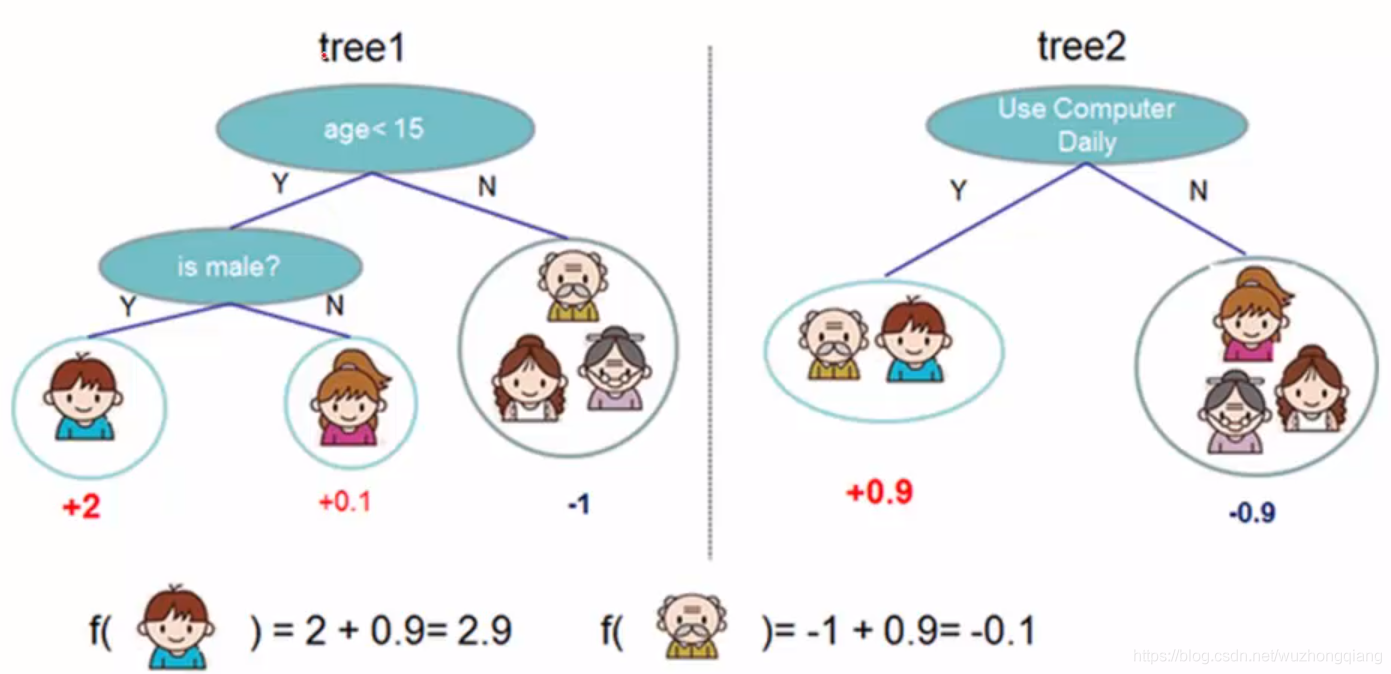

**Xgboost 是基于GBDT算法的工程化实现，是一种多个模型组成的加法运算**

Xgboost 的全称是eXtreme Gradient Boosting，由华盛顿大学的陈天奇博士提出，在Kaggle的希格斯子信号识别竞赛中使用，因其出众的效率与较高的预测准确度而引起了广泛的关注。

Xgboost是属于boosting家族，是GBDT算法的一个工程实现， 在模型的训练过程中是聚焦残差，在目标函数中使用了二阶泰勒展开并加入了正则，在决策树的生成过程中采用了精确贪心的思路，寻找最佳分裂点的时候，使用了预排序算法， 对所有特征都按照特征的数值进行预排序， 然后遍历所有特征上的所有分裂点位，计算按照这些候选分裂点位分裂后的全部样本的目标函数增益，找到最大的那个增益对应的特征和候选分裂点位，从而进行分裂。这样一层一层的完成建树过程， xgboost训练的时候，是通过加法的方式进行训练，也就是每一次通过聚焦残差训练一棵树出来， 最后的预测结果是所有树的加和表示。

如果boosting算法每一步的弱分类器生成都是依据损失函数的梯度方向，则称之为梯度提升(Gradient boosting)，XGBoost算法是采用分步前向加性模型，只不过在每次迭代中生成弱学习器后不再需要计算一个系数，XGBoost 是由 k 个基模型组成的一个加法运算式

XGBoost算法通过优化结构化损失函数（加入了正则项的损失函数，可以起到降低过拟合的风险）来实现弱学习器的生成，并且XGBoost算法没有采用搜索方法，而是直接利用了损失函数的一阶导数和二阶导数值，并通过预排序、加权分位数等技术来大大提高了算法的性能。以下图例为介绍Xgboost的算法：

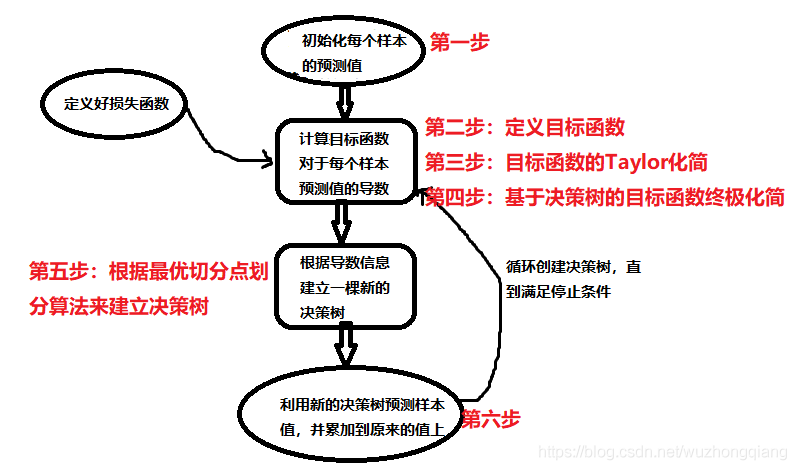

参考网址：https://blog.csdn.net/wuzhongqiang/article/details/104854890

#### 4.2.3.3 LightGBM

2017年由微软提出，是GBDT模型的另一个进化版本， 主要用于解决GBDT在海量数据中遇到的问题，以便更好更快的用于工业实践中。从 LightGBM 名字我们可以看出其是轻量级（Light）的梯度提升机器（GBM）， 所以面对大规模数据集，它依然非常淡定，跑起来更加轻盈。

谈到竞赛中的神器，我们难免又想到了xgboost， 同是神器， 既然有了一个xgboost， 为啥还要出个Lightgbm呢？所谓既生瑜何生亮， 难道Lightgbm相对于xgboost会有什么优势吗？ 那是当然， LightGBM在xgboost的基础上进行了很多的优化， 可以看成是XGBoost的升级加强版，它延续了xgboost的那一套集成学习的方式，但是它更加关注模型的训练速度，相对于xgboost， 具有训练速度快和内存占用率低的特点。

没太看懂，之后会逐步了解

参考网址：https://blog.csdn.net/wuzhongqiang/article/details/105350579

## 4.3 模型评估方法

对于模型来说，其在训练集上面的误差我们称之为训练误差或者**经验误差**，而在测试集上的误差称之为**测试误差**。

**对于数据集的划分，我们通常要保证满足以下两个条件：**

1) 训练集和测试集的分布要与样本真实分布一致，即训练集和测试集都要保证是从样本真实分布中独立同分布采样而得；

2) 训练集和测试集要互斥


**数据集的划分有三种方法：留出法，交叉验证法和自助法:**

1) 留出法(hold-out):

将数据集D划分为两个互斥的集合，其中一个集合作为训练集S，另一个作为测试集T。

为了尽可能保证数据分布的一致性，即避免因数据划分过程引入额外的偏差而对最终结果产生影响，我们通常采用分层采样的方式来对数据进行采样。例如，对于正负两个样本集进行分别采样。

Tips： 通常，会将数据集D中大约2/3~4/5的样本作为训练集，其余的作为测试集

2) k折交叉验证(K-fold):

通常将数据集D分为k份，其中k-1份作为训练集，剩余的一份作为测试集，这样就可以获得k组训练/测试集，可以进行k次训练与测试，最终返回的是k个测试结果的均值。交叉验证中数据集的划分依然是依据分层采样的方式来进行。

对于交叉验证法，其k值的选取往往决定了评估结果的稳定性和保真性，通常k值选取10。

当k=1的时候，我们称之为留一法

3) 自助法(bootstrapping):

每次从数据集D中取一个样本作为训练集中的元素，然后把该样本放回，重复该行为m次，这样我们就可以得到大小为m的训练集，在这里面有的样本重复出现，有的样本则没有出现过，我们把那些没有出现过的样本作为测试集。

进行这样采样的原因是因为在D中约有36.8%的数据没有在训练集中出现过。留出法与交叉验证法都是使用分层采样的方式进行数据采样与划分，而自助法则是使用有放回重复采样的方式进行数据采样

## 4.4 模型评价标准

评价指标针对不同的机器学习任务有不同的指标，同一任务也有不同侧重点的评价指标。
主要有分类（classification）、回归（regression）、排序（ranking）、聚类（clustering）、热门主题模型（topic modeling）、推荐（recommendation）等。

### 4.4.1 分类评价指标

acc、recall、F1、混淆矩阵、分类综合报告,ROC 等等

### 4.4.2 回归评价指标

MSE, RMSE, Mean Absolute Error, Median Absolute Error, R2 score 等等

### 4.4.3 聚类评价指标

Adjusted Rand index 调整兰德系数， Mutual Information based scores 互信息， Homogeneity, completeness and V-measure 等等

**对于本次比赛，我们选用自定义的abs-sum作为模型评价标准。**

## 4.5 模型范式

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

import os
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 4.5.1 读取数据

reduce_mem_usage 可用于减少内存的使用

In [2]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
# 读取数据
data = pd.read_csv('./train.csv')
# 简单预处理
data_list = []
for items in data.values:
    data_list.append([items[0]] + [float(i) for i in items[1].split(',')] + [items[2]])

data = pd.DataFrame(np.array(data_list))
data.columns = ['id'] + ['s_'+str(i) for i in range(len(data_list[0])-2)] + ['label']

data = reduce_mem_usage(data)

Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%


### 4.5.2 简单建模

建模之前进行预操作

In [7]:
from sklearn.model_selection import KFold
# 分离数据集，方便进行交叉验证
X_train = data.drop(['id','label'], axis=1)
y_train = data['label']

# 5折交叉验证
folds = 5
seed = 2021
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

树模型没有f1-score指标，所以自定义f1-score评价指标

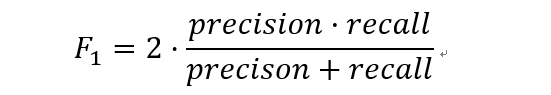

In [8]:
def f1_score_vali(preds, data_vali):
    labels = data_vali.get_label()
    preds = np.argmax(preds.reshape(4, -1), axis=0)
    score_vali = f1_score(y_true=labels, y_pred=preds, average='macro')
    return 'f1_score', score_vali, True

使用Lightgbm进行建模

In [10]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [14]:
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
    "learning_rate": 0.1,
    "boosting": 'gbdt',  
    "lambda_l2": 0.1,
    "max_depth": -1,
    "num_leaves": 128,
    "bagging_fraction": 0.8,
    "feature_fraction": 0.8,
    "metric": None,
    "objective": "multiclass",
    "num_class": 4,
    "nthread": 10,
    "verbose": -1,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, 
                  train_set=train_matrix, 
                  valid_sets=valid_matrix, 
                  num_boost_round=2000, 
                  verbose_eval=50, 
                  early_stopping_rounds=200,
                  feval=f1_score_vali)

Training until validation scores don't improve for 200 rounds
[50]	valid_0's multi_logloss: 0.0501715	valid_0's f1_score: 0.959265
[100]	valid_0's multi_logloss: 0.044548	valid_0's f1_score: 0.966164
[150]	valid_0's multi_logloss: 0.0463593	valid_0's f1_score: 0.967715
[200]	valid_0's multi_logloss: 0.0483513	valid_0's f1_score: 0.967776
[250]	valid_0's multi_logloss: 0.0499371	valid_0's f1_score: 0.968384
Early stopping, best iteration is:
[94]	valid_0's multi_logloss: 0.0444254	valid_0's f1_score: 0.966204


In [15]:
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
preds = np.argmax(val_pre_lgb, axis=1)
print(preds)
score = f1_score(y_true=y_val, y_pred=preds, average='macro')
print('未调参前lightgbm单模型在验证集上的f1：{}'.format(score))

[0 0 0 ... 0 0 0]
未调参前lightgbm单模型在验证集上的f1：0.9662040175716747


使用5折交叉验证进行模型性能评估

In [13]:
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                "learning_rate": 0.1,
                "boosting": 'gbdt',  
                "lambda_l2": 0.1,
                "max_depth": -1,
                "num_leaves": 128,
                "bagging_fraction": 0.8,
                "feature_fraction": 0.8,
                "metric": None,
                "objective": "multiclass",
                "num_class": 4,
                "nthread": 10,
                "verbose": -1,
            }
    
    model = lgb.train(params, 
                      train_set=train_matrix, 
                      valid_sets=valid_matrix, 
                      num_boost_round=2000, 
                      verbose_eval=100, 
                      early_stopping_rounds=200,
                      feval=f1_score_vali)
    
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    val_pred = np.argmax(val_pred, axis=1)
    cv_scores.append(f1_score(y_true=y_val, y_pred=val_pred, average='macro'))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.0408155	valid_0's f1_score: 0.966797
[200]	valid_0's multi_logloss: 0.0437957	valid_0's f1_score: 0.971239
Early stopping, best iteration is:
[96]	valid_0's multi_logloss: 0.0406453	valid_0's f1_score: 0.967452
[0.9674515729721614]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.0472933	valid_0's f1_score: 0.965828
[200]	valid_0's multi_logloss: 0.0514952	valid_0's f1_score: 0.968138
Early stopping, best iteration is:
[87]	valid_0's multi_logloss: 0.0467472	valid_0's f1_score: 0.96567
[0.9674515729721614, 0.9656700872844327]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.0378

### 4.5.3 模型调参

#### 4.5.3.1 贪心调参

先使用当前对模型影响最大的参数进行调优，达到当前参数下的模型最优化，再使用对模型影响次之的参数进行调优，如此下去，直到所有的参数调整完毕。

这个方法的缺点就是可能会调到局部最优而不是全局最优，但是只需要一步一步的进行参数最优化调试即可，容易理解。

需要注意的是在树模型中参数调整的顺序，也就是各个参数对模型的影响程度，这里列举一下日常调参过程中常用的参数和调参顺序：

①：max_depth、num_leaves

②：min_data_in_leaf、min_child_weight

③：bagging_fraction、 feature_fraction、bagging_freq

④：reg_lambda、reg_alpha

⑤：min_split_gain

In [16]:
from sklearn.model_selection import cross_val_score
# 调objective
best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    best_obj[obj] = score

# num_leaves
best_leaves = dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    best_leaves[leaves] = score

# max_depth
best_depth = dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    """预测并计算roc的相关指标"""
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    best_depth[depth] = score

"""
可依次将模型的参数通过上面的方式进行调整优化，并且通过可视化观察在每一个最优参数下模型的得分情况
"""

NameError: name 'objective' is not defined

#### 4.5.3.2 网格搜索

sklearn 提供GridSearchCV用于进行网格搜索，只需要把模型的参数输进去，就能给出最优化的结果和参数。相比起贪心调参，网格搜索的结果会更优，但是网格搜索只适合于小数据集，一旦数据的量级上去了，很难得出结果。

In [17]:
"""通过网格搜索确定最优参数"""
from sklearn.model_selection import GridSearchCV

def get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=31, max_depth=-1, bagging_fraction=1.0, 
                       feature_fraction=1.0, bagging_freq=0, min_data_in_leaf=20, min_child_weight=0.001, 
                       min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=None):
    # 设置5折交叉验证
    cv_fold = KFold(n_splits=5, shuffle=True, random_state=2021)

    model_lgb = lgb.LGBMClassifier(learning_rate=learning_rate,
                                   n_estimators=n_estimators,
                                   num_leaves=num_leaves,
                                   max_depth=max_depth,
                                   bagging_fraction=bagging_fraction,
                                   feature_fraction=feature_fraction,
                                   bagging_freq=bagging_freq,
                                   min_data_in_leaf=min_data_in_leaf,
                                   min_child_weight=min_child_weight,
                                   min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda,
                                   reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )

    f1 = make_scorer(f1_score, average='micro')
    grid_search = GridSearchCV(estimator=model_lgb, 
                               cv=cv_fold,
                               param_grid=param_grid,
                               scoring=f1

                              )
    grid_search.fit(X_train, y_train)

    print('模型当前最优参数为:{}'.format(grid_search.best_params_))
    print('模型当前最优得分为:{}'.format(grid_search.best_score_))

In [20]:
"""以下代码未运行，耗时较长，请谨慎运行，且每一步的最优参数需要在下一步进行手动更新，请注意"""

"""
需要注意一下的是，除了获取上面的获取num_boost_round时候用的是原生的lightgbm（因为要用自带的cv）
下面配合GridSearchCV时必须使用sklearn接口的lightgbm。
"""
"""设置n_estimators 为581，调整num_leaves和max_depth，这里选择先粗调再细调"""
lgb_params = {'num_leaves': range(10, 80, 5), 'max_depth': range(3,10,2)}
# get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=None, max_depth=None, min_data_in_leaf=20, 
#                    min_child_weight=0.001,bagging_fraction=1.0, feature_fraction=1.0, bagging_freq=0, 
#                    min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

"""num_leaves为30，max_depth为7，进一步细调num_leaves和max_depth"""
lgb_params = {'num_leaves': range(25, 35, 1), 'max_depth': range(5,9,1)}
# get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=None, max_depth=None, min_data_in_leaf=20, 
#                    min_child_weight=0.001,bagging_fraction=1.0, feature_fraction=1.0, bagging_freq=0, 
#                    min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

"""
确定min_data_in_leaf为45，min_child_weight为0.001 ，下面进行bagging_fraction、feature_fraction和bagging_freq的调参
"""
lgb_params = {'bagging_fraction': [i/10 for i in range(5,10,1)], 
              'feature_fraction': [i/10 for i in range(5,10,1)],
              'bagging_freq': range(0,81,10)
             }
# get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=29, max_depth=7, min_data_in_leaf=45, 
#                    min_child_weight=0.001,bagging_fraction=None, feature_fraction=None, bagging_freq=None, 
#                    min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

"""
确定bagging_fraction为0.4、feature_fraction为0.6、bagging_freq为 ，下面进行reg_lambda、reg_alpha的调参
"""
lgb_params = {'reg_lambda': [0,0.001,0.01,0.03,0.08,0.3,0.5], 'reg_alpha': [0,0.001,0.01,0.03,0.08,0.3,0.5]}
# get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=29, max_depth=7, min_data_in_leaf=45, 
#                    min_child_weight=0.001,bagging_fraction=0.9, feature_fraction=0.9, bagging_freq=40, 
#                    min_split_gain=0, reg_lambda=None, reg_alpha=None, param_grid=lgb_params)

"""
确定reg_lambda、reg_alpha都为0，下面进行min_split_gain的调参
"""
lgb_params = {'min_split_gain': [i/10 for i in range(0,11,1)]}
# get_best_cv_params(learning_rate=0.1, n_estimators=85, num_leaves=29, max_depth=7, min_data_in_leaf=45, 
#                    min_child_weight=0.001,bagging_fraction=0.9, feature_fraction=0.9, bagging_freq=40, 
#                    min_split_gain=None, reg_lambda=0, reg_alpha=0, param_grid=lgb_params)

In [21]:
"""
参数确定好了以后，我们设置一个比较小的learning_rate 0.005，来确定最终的num_boost_round
"""
# 设置5折交叉验证
# cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True, )
final_params = {
                'boosting_type': 'gbdt',
                'learning_rate': 0.01,
                'num_leaves': 29,
                'max_depth': 7,
                'objective': 'multiclass',
                'num_class': 4,
                'min_data_in_leaf':45,
                'min_child_weight':0.001,
                'bagging_fraction': 0.9,
                'feature_fraction': 0.9,
                'bagging_freq': 40,
                'min_split_gain': 0,
                'reg_lambda':0,
                'reg_alpha':0,
                'nthread': 6
               }

cv_result = lgb.cv(train_set=lgb_train,
                   early_stopping_rounds=20,
                   num_boost_round=5000,
                   nfold=5,
                   stratified=True,
                   shuffle=True,
                   params=final_params,
                   feval=f1_score_vali,
                   seed=0,
                  )

NameError: name 'lgb_train' is not defined

在实际调整过程中，可先设置一个较大的学习率（上面的例子中0.1），通过Lgb原生的cv函数进行树个数的确定，之后再通过上面的实例代码进行参数的调整优化。

最后针对最优的参数设置一个较小的学习率（例如0.05），同样通过cv函数确定树的个数，确定最终的参数。

需要注意的是，针对大数据集，上面每一层参数的调整都需要耗费较长时间，

#### 4.5.3.3 贝叶斯调参

贝叶斯调参的主要思想是：给定优化的目标函数(广义的函数，只需指定输入和输出即可，无需知道内部结构以及数学性质)，通过不断地添加样本点来更新目标函数的后验分布(高斯过程,直到后验分布基本贴合于真实分布）。简单的说，贝叶斯优化通过基于目标函数的过去评估结果建立替代函数（概率模型），来找到最小化目标函数的值。贝叶斯方法与随机或网格搜索的不同之处在于，它在尝试下一组超参数时，会参考之前的评估结果，因此可以省去很多无用功。

贝叶斯调参的步骤如下：

    定义优化函数(rf_cv）
    建立模型
    定义待优化的参数
    得到优化结果，并返回要优化的分数指标

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
"""定义优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=4,
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    f1 = make_scorer(f1_score, average='micro')
    val = cross_val_score(model_lgb, X_train_split, y_train_split, cv=5, scoring=f1).mean()

    return val

In [28]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),
        'reg_lambda':(0.0, 10),
    }
)

"""开始优化"""
bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.87, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.87
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_fraction is set=0.96, subsample=1.0 will be ignored. Current value: bagging_fraction=0.96
[LightGBM] [Warning] bagging_freq is set=77, subsample_freq=0 will be ignored. Current value: bagging_freq=77
[LightGBM] [Warning] feature_fraction is set=0.87, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.87
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min

[LightGBM] [Warning] feature_fraction is set=0.62, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.62
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_fraction is set=0.63, subsample=1.0 will be ignored. Current value: bagging_fraction=0.63
[LightGBM] [Warning] bagging_freq is set=69, subsample_freq=0 will be ignored. Current value: bagging_freq=69
[LightGBM] [Warning] feature_fraction is set=0.62, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.62
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_fraction is set=0.63, subsample=1.0 will be ignored. Current value: bagging_fraction=0.63
[LightGBM] [Warning] bagging_freq is set=69, subsample_freq=0 will be ignored. Current value: bagging_freq=69
[LightGBM] [Warning] feature_fraction is set=0

[LightGBM] [Warning] feature_fraction is set=0.53, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.53
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_fraction is set=0.64, subsample=1.0 will be ignored. Current value: bagging_fraction=0.64
[LightGBM] [Warning] bagging_freq is set=45, subsample_freq=0 will be ignored. Current value: bagging_freq=45
[LightGBM] [Warning] feature_fraction is set=0.53, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.53
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_fraction is set=0.64, subsample=1.0 will be ignored. Current value: bagging_fraction=0.64
[LightGBM] [Warning] bagging_freq is set=45, subsample_freq=0 will be ignored. Current value: bagging_freq=45
[LightGBM] [Warning] feature_fraction is set=0

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_fraction is set=0.67, subsample=1.0 will be ignored. Current value: bagging_fraction=0.67
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_fraction is set=0.67, subsample=1.0 will be ignored. Current value: bagging_fraction=0.67
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
|  10       |  0.9721   |  0.6692   |  12.92    | 

[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
|  13       |  0.9787   |  0.749    |  10.71    |  0.8521   |  12.32    |  5.394    |  92.28    |  0.8868   |  196.3    |  2.821    |  3.6      |
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_fraction is set=0.56, subsample=1.0 will be ignored. Current value: bagging_fraction=0.56
[LightGBM] [

In [29]:
##显示结果
bayes_lgb.max

{'target': 0.9834625000000001,
 'params': {'bagging_fraction': 0.7881540508675626,
  'bagging_freq': 21.235516246620946,
  'feature_fraction': 0.874071662458024,
  'max_depth': 18.625329559440317,
  'min_child_weight': 2.783247321049668,
  'min_data_in_leaf': 19.953878192651047,
  'min_split_gain': 0.28654571884131497,
  'num_leaves': 158.08973729410073,
  'reg_alpha': 0.594744792999734,
  'reg_lambda': 2.851366590278497}}

参数优化完成后，我们可以根据优化后的参数建立新的模型，降低学习率并寻找最优模型迭代次数

In [30]:
"""调整一个较小的学习率，并通过cv函数确定当前最优的迭代次数"""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'multiclass',
                    'num_class': 4,
                    'learning_rate': 0.01,
                    'num_leaves': 138,
                    'max_depth': 11,
                    'min_data_in_leaf': 43,
                    'min_child_weight':6.5,
                    'bagging_fraction': 0.64,
                    'feature_fraction': 0.93,
                    'bagging_freq': 49,
                    'reg_lambda': 7,
                    'reg_alpha': 0.21,
                    'min_split_gain': 0.288,
                    'nthread': 10,
                    'verbose': -1,
}

cv_result_lgb = lgb.cv(
    train_set=train_matrix,
    early_stopping_rounds=1000, 
    num_boost_round=20000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=base_params_lgb,
    feval=f1_score_vali,
    seed=0
)
print('迭代次数{}'.format(len(cv_result_lgb['f1_score-mean'])))
print('最终模型的f1为{}'.format(max(cv_result_lgb['f1_score-mean'])))

迭代次数2498
最终模型的f1为0.9599200084685731


模型参数已经确定，建立最终模型并对验证集进行验证

In [31]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]

    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'multiclass',
                'num_class': 4,
                'learning_rate': 0.01,
                'num_leaves': 138,
                'max_depth': 11,
                'min_data_in_leaf': 43,
                'min_child_weight':6.5,
                'bagging_fraction': 0.64,
                'feature_fraction': 0.93,
                'bagging_freq': 49,
                'reg_lambda': 7,
                'reg_alpha': 0.21,
                'min_split_gain': 0.288,
                'nthread': 10,
                'verbose': -1,
    }

    model = lgb.train(params, train_set=train_matrix, num_boost_round=4833, valid_sets=valid_matrix, 
                      verbose_eval=1000, early_stopping_rounds=200, feval=f1_score_vali)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    val_pred = np.argmax(val_pred, axis=1)
    cv_scores.append(f1_score(y_true=y_val, y_pred=val_pred, average='macro'))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's multi_logloss: 0.050037	valid_0's f1_score: 0.958168
Early stopping, best iteration is:
[1639]	valid_0's multi_logloss: 0.0439137	valid_0's f1_score: 0.961506
[0.9615056903324599]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's multi_logloss: 0.0562826	valid_0's f1_score: 0.953819
[2000]	valid_0's multi_logloss: 0.0484745	valid_0's f1_score: 0.959567
Early stopping, best iteration is:
[1869]	valid_0's multi_logloss: 0.0488369	valid_0's f1_score: 0.959783
[0.9615056903324599, 0.9597829114711733]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
[1000]	valid_0's multi_logloss: 0.0491551	valid_0's f1_score: 0.958783
[2000]	valid_0's multi_loglos

**小结：** 一共介绍了贪心调参、网格搜索调参、贝叶斯调参共三种调参手段，其中贝叶斯调参的原理需要进一步了解

**最后总结：** 对于集成方法和模型的了解远远不够，贝叶斯调参需要进一步深入了解。